In [4]:
#!pip install pip install scikit-learn-extra
#!pip install -U scikit-fuzzy
#!pip install pycountry_convert
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
import random
import skfuzzy as fuzz
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from skfuzzy import control as ctrl
from sklearn.preprocessing import StandardScaler
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

data = pd.read_csv('C:/Users/tsarget/OneDrive/Desktop/social media influencers - instagram.csv')
print(data.head())

  Influencer insta name instagram name          category_1 category_2  \
0                   433            433  Sports with a ball        NaN   
1          __youngbae__        TAEYANG               Music        NaN   
2           _agentgirl_  НАСТЯ ИВЛЕЕВА               Shows        NaN   
3           _imyour_joy            Joy           Lifestyle        NaN   
4         _jeongjaehyun        Jaehyun                 NaN        NaN   

  Followers Audience country(mostly) Authentic engagement\r\n  \
0     48.5M                    Spain                   383.1K   
1     12.7M                Indonesia                     478K   
2     18.8M                   Russia                   310.8K   
3     13.5M                Indonesia                     1.1M   
4     11.1M                Indonesia                     2.5M   

  Engagement avg\r\n  
0               637K  
1             542.3K  
2             377.9K  
3               1.4M  
4               3.1M  


In [5]:
print(data.tail(),"\n\n")
print(data.dtypes,"\n\n")
data['Followers'] = data['Followers'].astype('string')
data['Authentic engagement\r\n'] = data['Authentic engagement\r\n'].astype('string')
data['Engagement avg\r\n'] = data['Engagement avg\r\n'].astype('string')
print(data.dtypes,"\n\n")

    Influencer insta name instagram name                 category_1  \
995               zendaya        Zendaya  Cinema & Actors/actresses   
996                zidane         zidane         Sports with a ball   
997                zkdlin            KAI                      Music   
998    zoeisabellakravitz   Zoë Kravitz  Cinema & Actors/actresses   
999               zoesugg      Zoë Sugg                  Lifestyle   

             category_2 Followers Audience country(mostly)  \
995             Fashion    136.1M            United States   
996                 NaN     31.2M                    Spain   
997                 NaN     13.9M                Indonesia   
998                 NaN      8.2M            United States   
999  Business & Careers      9.4M           United Kingdom   

    Authentic engagement\r\n Engagement avg\r\n  
995                     6.4M               8.6M  
996                     546K             744.1K  
997                     1.3M               1.6M  


In [6]:
# function to convert string to float
def convert_value(df,column_name):
    k=0
    char=[]
    for j in df[column_name]:
        if j[-1]!="M"and j[-1]!="K"and j[-1]!="B":
            k=k+1
            char.extend(" ")
            continue
        char.extend(j[-1])
        df.loc[k,column_name]=j[:-1]
        k=k+1    
    df[column_name] = df[column_name].astype('float')    
    for i, value in enumerate(df[column_name]):
        if char[i]=='M':
            df.loc[i,column_name]=df.loc[i,column_name]*1000000
            continue
        if char[i]=='K':
            df.loc[i,column_name]=df.loc[i,column_name]*1000 
            continue
        if char[i]=='B':
            df.loc[i,column_name]=df.loc[i,column_name]*1000000000     
convert_value(data,'Followers')
convert_value(data,'Authentic engagement\r\n')
convert_value(data,'Engagement avg\r\n')
print(data.dtypes)

Influencer insta name        object
instagram name               object
category_1                   object
category_2                   object
Followers                   float64
Audience country(mostly)     object
Authentic engagement\r\n    float64
Engagement avg\r\n          float64
dtype: object


In [7]:
data.duplicated()
data.drop_duplicates()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48500000.0,Spain,383100.0,637000.0
1,__youngbae__,TAEYANG,Music,NaN,12700000.0,Indonesia,478000.0,542300.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18800000.0,Russia,310800.0,377900.0
3,_imyour_joy,Joy,Lifestyle,NaN,13500000.0,Indonesia,1100000.0,1400000.0
4,_jeongjaehyun,Jaehyun,NaN,NaN,11100000.0,Indonesia,2500000.0,3100000.0
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136100000.0,United States,6400000.0,8600000.0
996,zidane,zidane,Sports with a ball,NaN,31200000.0,Spain,546000.0,744100.0
997,zkdlin,KAI,Music,NaN,13900000.0,Indonesia,1300000.0,1600000.0
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8200000.0,United States,583000.0,885500.0


In [8]:
print(data.info(),"\n\n")
print(data.isnull().sum(),"\n\n")
print(data.isnull().sum().sum(),"\n\n")
# assign the instagram name to null values in Influencer insta name
data["instagram name"].fillna(data["Influencer insta name"],inplace=True)
print(data.isnull().sum(),"\n\n")
print(data["Authentic engagement\r\n"].nsmallest(10),"\n\n") #To show outliers
print(data["Engagement avg\r\n"].nsmallest(10),"\n\n")
data.dropna(subset=["Audience country(mostly)"],inplace=True)
#make sure that outliers in Authentic engagement removed by removing null values in Audience country(mostly)
print(data["Authentic engagement\r\n"].nsmallest(10),"\n\n")
print(data.isnull().sum(),"\n\n")
print("Data describe: \n",data.describe(),"\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Influencer insta name     1000 non-null   object 
 1   instagram name            979 non-null    object 
 2   category_1                892 non-null    object 
 3   category_2                287 non-null    object 
 4   Followers                 1000 non-null   float64
 5   Audience country(mostly)  986 non-null    object 
 6   Authentic engagement
    1000 non-null   float64
 7   Engagement avg
          1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB
None 


Influencer insta name         0
instagram name               21
category_1                  108
category_2                  713
Followers                     0
Audience country(mostly)     14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64 


856 


Influen

In [9]:
warnings.filterwarnings("ignore", category=UserWarning)
# Define a function to get continent based on country
def get_continent(country):
    try:
        country_code = country_name_to_country_alpha2(country)
        continent_code = country_alpha2_to_continent_code(country_code)
        continent = continent_code.upper()
        return continent
    except:
        return 'Unknown'

# Apply the function to create a new column indicating the continent for each country
data['Continent'] = data['Audience country(mostly)'].apply(get_continent)

print(data.head(),"\n\n")

  Influencer insta name instagram name          category_1 category_2  \
0                   433            433  Sports with a ball        NaN   
1          __youngbae__        TAEYANG               Music        NaN   
2           _agentgirl_  НАСТЯ ИВЛЕЕВА               Shows        NaN   
3           _imyour_joy            Joy           Lifestyle        NaN   
4         _jeongjaehyun        Jaehyun                 NaN        NaN   

    Followers Audience country(mostly)  Authentic engagement\r\n  \
0  48500000.0                    Spain                  383100.0   
1  12700000.0                Indonesia                  478000.0   
2  18800000.0                   Russia                  310800.0   
3  13500000.0                Indonesia                 1100000.0   
4  11100000.0                Indonesia                 2500000.0   

   Engagement avg\r\n Continent  
0            637000.0        EU  
1            542300.0        AS  
2            377900.0        EU  
3           1400

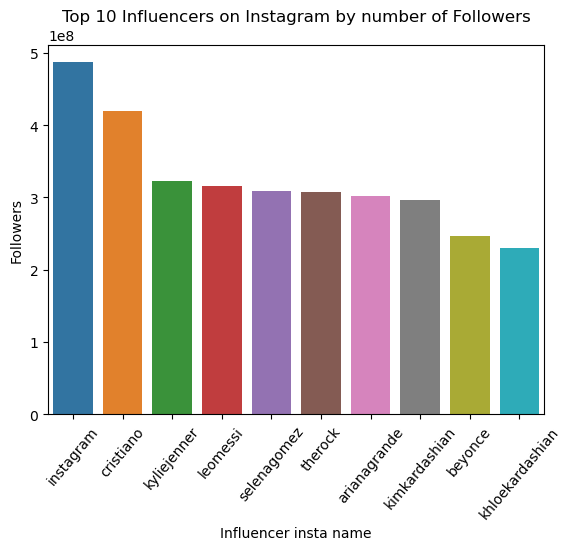

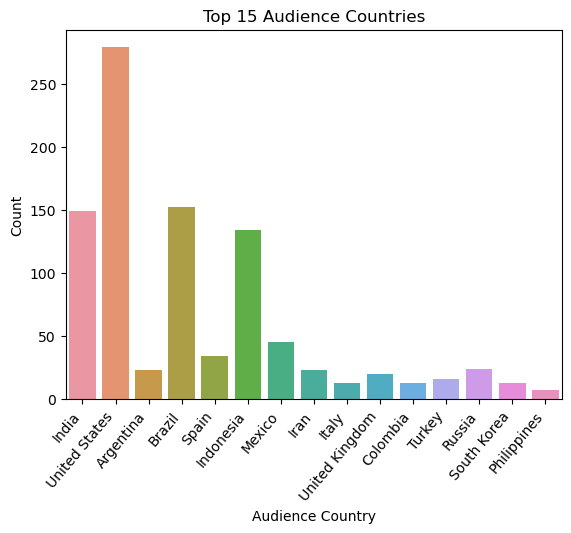

<Figure size 1000x600 with 0 Axes>

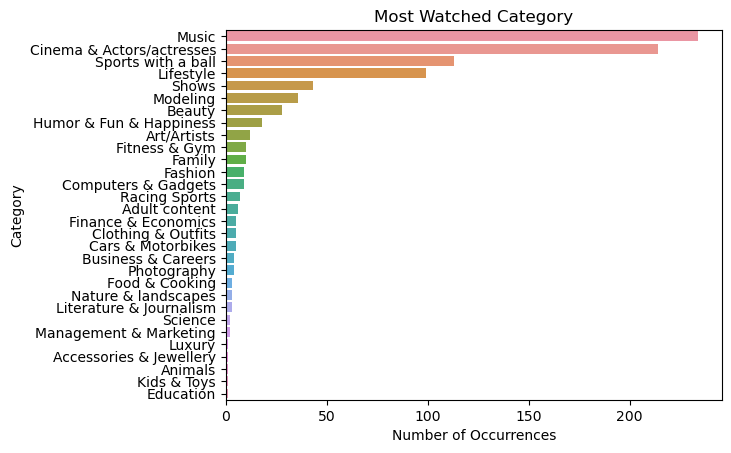

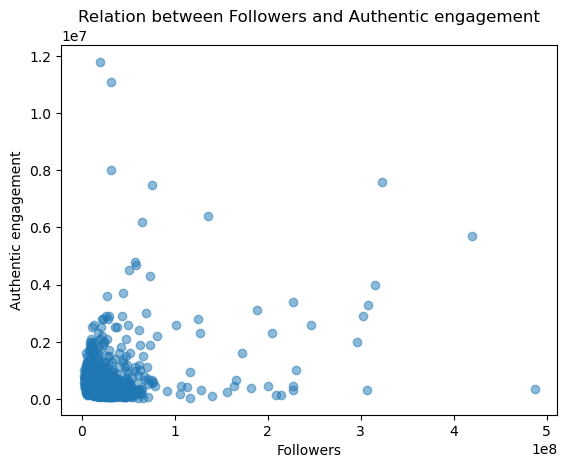

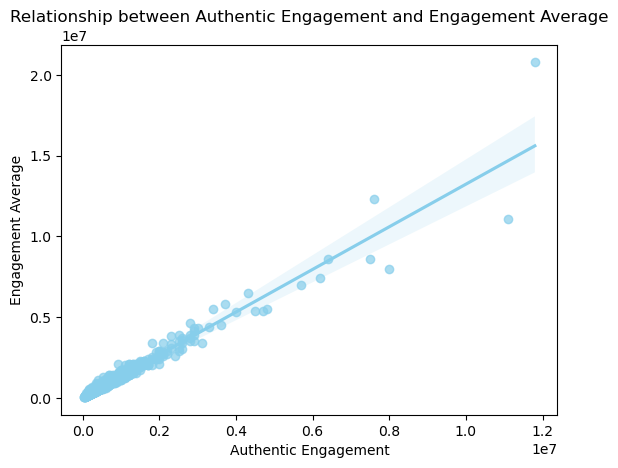

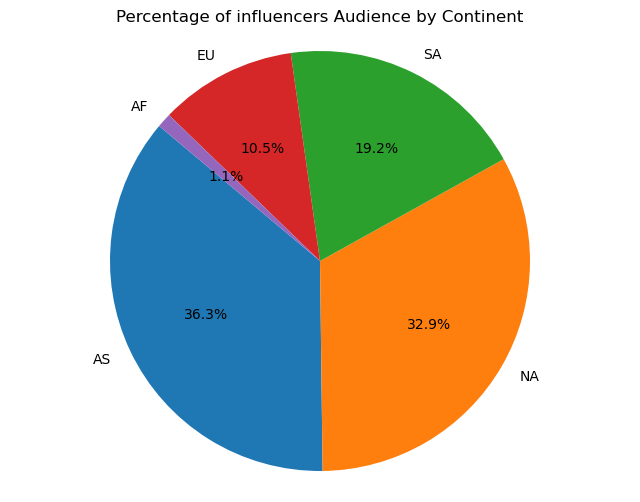

In [10]:
# Top 10 Influencers on Instagram by number of Followers
data = data.sort_values(by='Followers', ascending=False)
data_10 = data.head(10)
chart = sns.barplot(x="Influencer insta name", y="Followers", data=data_10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=50)
plt.title('Top 10 Influencers on Instagram by number of Followers')
plt.show()

# Top 15 most audiance countries
top_15_countries = data['Audience country(mostly)'].value_counts().head(15).index.tolist()
data_top_15 = data[data['Audience country(mostly)'].isin(top_15_countries)]
chart = sns.countplot(x="Audience country(mostly)", data=data_top_15)
chart.set_xticklabels(chart.get_xticklabels(), rotation=50, ha='right')  
plt.title('Top 15 Audience Countries')
plt.xlabel('Audience Country')
plt.ylabel('Count')
plt.figure(figsize=(10, 6))  
plt.tight_layout()
plt.show()

# the most watched category
sns.countplot(y="category_1", data=data, order=data['category_1'].value_counts().index)
plt.xlabel('Number of Occurrences')
plt.ylabel('Category')
plt.title('Most Watched Category')
plt.show()

# Plotting  relationship bet. number of followers and Authentic engagement 
plt.scatter(data['Followers'], data['Authentic engagement\r\n'], alpha=0.5)
plt.title('Relation between Followers and Authentic engagement')
plt.xlabel('Followers')
plt.ylabel('Authentic engagement')
plt.show()

# Plotting  relationship with regression line bet. Authentic engagement and Engagement avg
sns.regplot(x='Authentic engagement\r\n', y='Engagement avg\r\n', data=data, color='skyblue', scatter_kws={'alpha':0.7})
plt.xlabel('Authentic Engagement')
plt.ylabel('Engagement Average')
plt.title('Relationship between Authentic Engagement and Engagement Average')
plt.show()


# Calculate the percentage of each continent
continent_counts = data['Continent'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of influencers Audience by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




In [11]:
# K-Medoids
column1_values = data['Followers'].tolist()
column2_values = data['Authentic engagement\r\n'].tolist()
clusterlist = list(zip(column1_values, column2_values))
clusterdf = pd.DataFrame(clusterlist)
clusterarr=np.array(clusterdf)
clusterdf

,0,1
0,487200000.0,352300.0
1,419600000.0,5700000.0
2,323300000.0,7600000.0
3,315400000.0,4000000.0
4,308200000.0,3300000.0
...,...,...
981,3200000.0,666400.0
982,3200000.0,630200.0
983,3100000.0,997800.0
984,3000000.0,803900.0


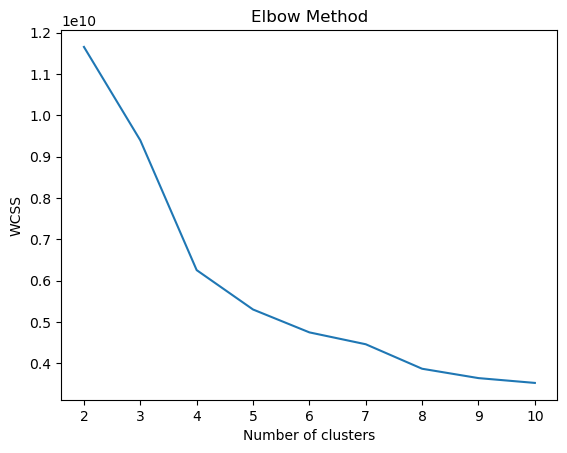

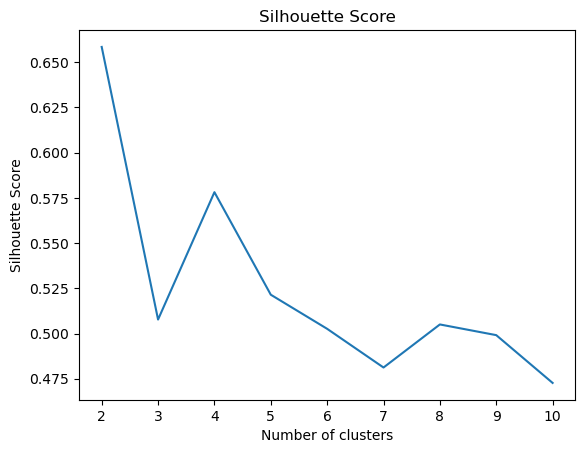

In [12]:
# To know number of clusters
# Elbow Method
wcss = []
for k in range(2, 11):
    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(clusterarr)
    wcss.append(kmedoids.inertia_)

# Plotting the Elbow Method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmedoids = KMedoids(n_clusters=k)
    labels = kmedoids.fit_predict(clusterarr)
    sil_score = silhouette_score(clusterarr, labels)
    sil_scores.append(sil_score)

# Plotting the Silhouette Score
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Cluster centroids (medoids):
[[23300000.   293900.]
 [ 9500000.   466500.]
 [61100000.   815300.]]

Cluster labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

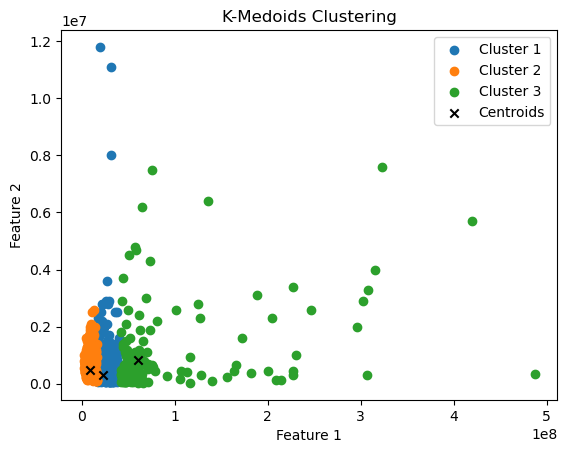

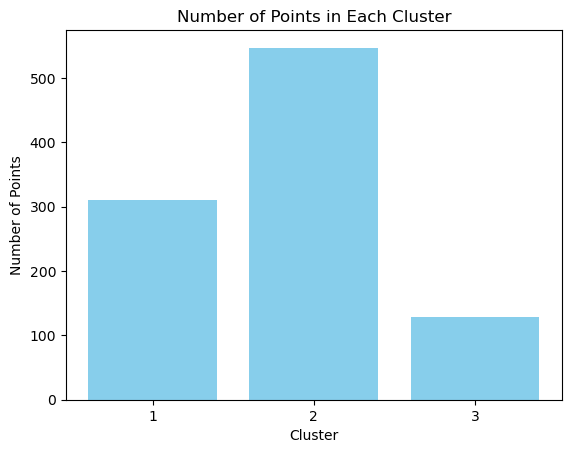

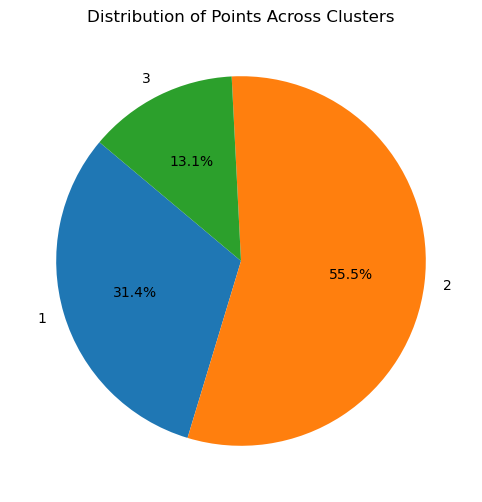

In [14]:
n_clusters = 3
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
kmedoids.fit(clusterarr)
medoids = kmedoids.cluster_centers_
labels = kmedoids.labels_

# Print cluster centroids (medoids)
print("Cluster centroids (medoids):")
print(medoids)

# Print cluster labels for each data point
print("\nCluster labels:")
print(labels)
# Print points associated with each cluster center
for i, medoid in enumerate(medoids):
    
    points_in_cluster = clusterarr[labels == i]  # Filter points belonging to the current cluster
    print(f"\nPoints in Cluster {i + 1}:")
    print(points_in_cluster)
        # Plot cluster points
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], label=f'Cluster {i+1}')

# Plot cluster centroids
plt.scatter(medoids[:, 0], medoids[:, 1], c='black', marker='x', label='Centroids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Count the number of points in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)

# Plot a bar chart showing the number of points in each cluster
plt.bar(unique_labels + 1, counts, color='skyblue')
plt.title('Number of Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(unique_labels + 1)
plt.show()

# Create a pie chart to show the distribution of points across clusters
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=unique_labels + 1, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribution of Points Across Clusters')
plt.show()


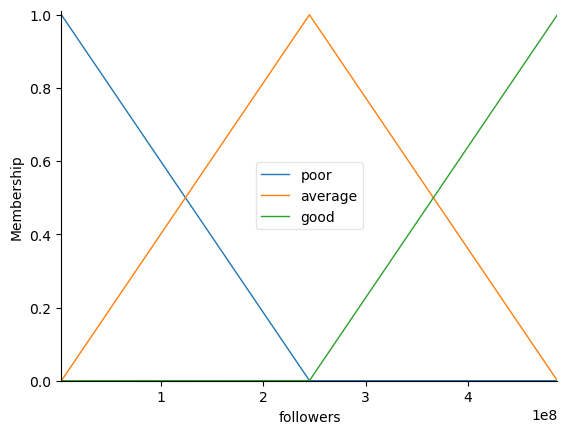

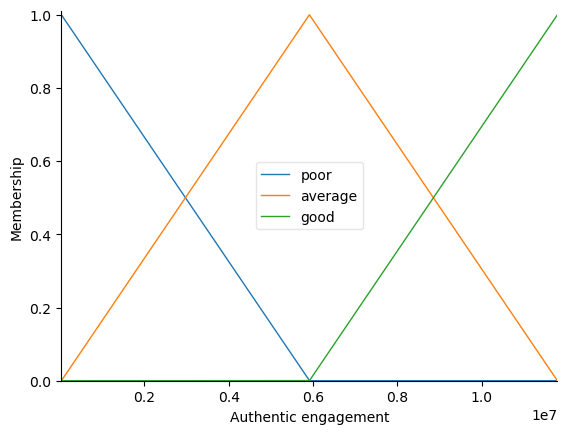

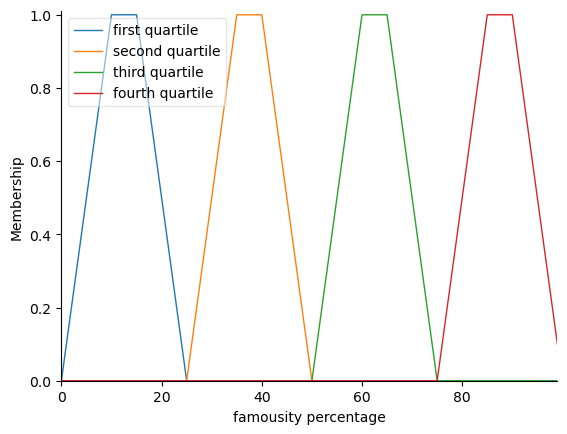

In [16]:
# Fuzzy logic
followers=ctrl.Antecedent(np.arange(data["Followers"].min(),data["Followers"].max(),100),"followers")
auth_enagement=ctrl.Antecedent(np.arange(data["Authentic engagement\r\n"].min(),data["Authentic engagement\r\n"].max(),100),"Authentic engagement")
famousity_percentage=ctrl.Consequent(np.arange(0,100,1),"famousity percentage")
followers.automf(3)
auth_enagement.automf(3)
famousity_percentage["first quartile"]=fuzz.trapmf(famousity_percentage.universe,[0,10,15,25])
famousity_percentage["second quartile"]=fuzz.trapmf(famousity_percentage.universe,[25,35,40,50])
famousity_percentage["third quartile"]=fuzz.trapmf(famousity_percentage.universe,[50,60,65,75])
famousity_percentage["fourth quartile"]=fuzz.trapmf(famousity_percentage.universe,[75,85,90,100])
followers.view()
auth_enagement.view()
famousity_percentage.view()

random choice Instagram name :  markiplier
Followers :  9800000.0
Authentic enagement :  406500.0
Famousity percentage is:  14.909895994628197 %


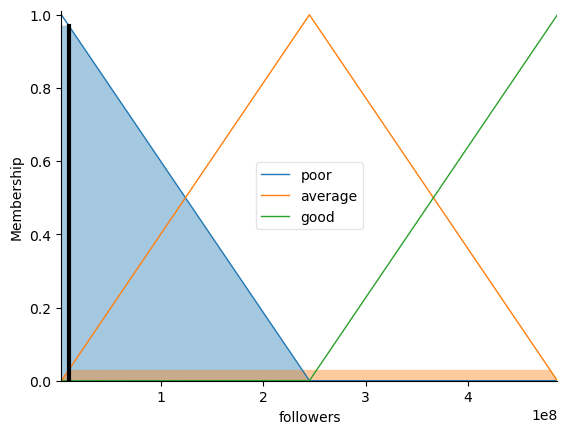

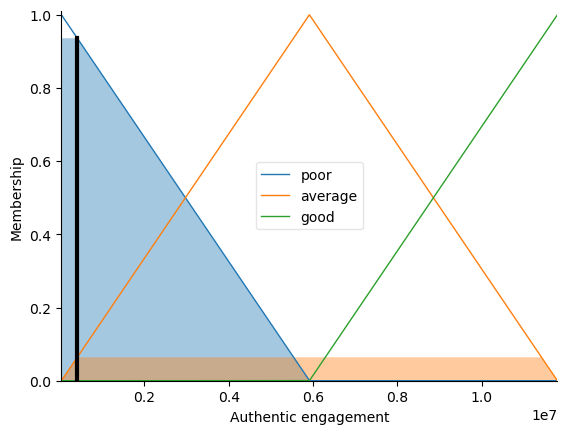

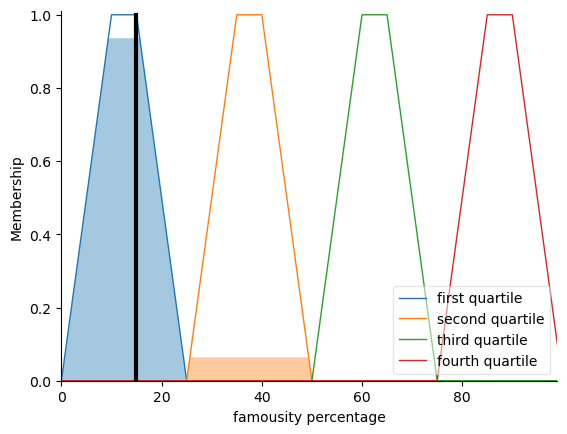

In [17]:
rule1=ctrl.Rule(followers["poor"]&auth_enagement["poor"],famousity_percentage["first quartile"])
rule2=ctrl.Rule(followers["good"]&auth_enagement["good"],famousity_percentage["fourth quartile"])
rule3=ctrl.Rule(followers["average"]&auth_enagement["good"],famousity_percentage["third quartile"])
rule4=ctrl.Rule(followers["good"]&auth_enagement["average"],famousity_percentage["third quartile"])
rule5=ctrl.Rule(followers["poor"]&auth_enagement["average"],famousity_percentage["second quartile"])
rule6=ctrl.Rule(followers["average"]&auth_enagement["poor"],famousity_percentage["second quartile"])
sprinkler_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])
sprinkler_simulator=ctrl.ControlSystemSimulation(sprinkler_system)
random_index = random.choice(range(len(data)))
sprinkler_simulator.input["followers"]=x=data.loc[random_index,"Followers"]
print("random choice Instagram name : ",data.loc[random_index,"Influencer insta name"])
print("Followers : ",x)
sprinkler_simulator.input["Authentic engagement"]=x=data.loc[random_index,"Authentic engagement\r\n"]
print("Authentic enagement : ",x)
sprinkler_simulator.compute()
value=sprinkler_simulator.output["famousity percentage"]
print("Famousity percentage is: ",value,"%")
followers.view(sprinkler_simulator)
auth_enagement.view(sprinkler_simulator)
famousity_percentage.view(sprinkler_simulator)